<a href="https://colab.research.google.com/github/onesummer123/c2s4_BDAO_Project/blob/main/big_data_ima_clean_table_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import storage
from google.cloud import bigquery

project_id = "c2s4-project"
dataset_name = "restaurant_dataset_1"
table_name = "restaurant_data"

bigquery_client = bigquery.Client(project=project_id)

In [26]:
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,109 E Hwy 50,O'Fallon,IL,62269,38.584549,-89.909163,1.5,45,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,3113 W Kennedy Blvd,Tampa,FL,33609,27.945087,-82.493933,3.0,87,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,1134 N Gravel Pike,Zieglerville,PA,19492,40.275734,-75.478052,3.5,27,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,2100 Lower State Rd,Doylestown,PA,18901,40.293535,-75.150953,4.0,16,...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,106 Ark Rd,Lumberton,NJ,08048,39.941709,-74.852849,3.0,35,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [27]:
import pandas as pd

restuarnt_df = restaurant_df.drop_duplicates()

restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,109 E Hwy 50,O'Fallon,IL,62269,38.584549,-89.909163,1.5,45,...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,3113 W Kennedy Blvd,Tampa,FL,33609,27.945087,-82.493933,3.0,87,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,1134 N Gravel Pike,Zieglerville,PA,19492,40.275734,-75.478052,3.5,27,...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,2100 Lower State Rd,Doylestown,PA,18901,40.293535,-75.150953,4.0,16,...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,106 Ark Rd,Lumberton,NJ,08048,39.941709,-74.852849,3.0,35,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [28]:
restaurant_df = restaurant_df.drop(columns=['postal_code', 'address','hours'])
restaurant_df

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"{'NoiseLevel': ""u'average'"", 'GoodForKids': 'T...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...",...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...",...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,7Qcdxav_IcbDvn_oYAVsKw,Italian Gardens Restaurant,Indianapolis,IN,39.773836,-86.019973,3.0,35,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...",...,'quiet',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
52282,AsMmX7njOzFkWsJQ1jMVCg,The Boozy Pig,Tampa,FL,27.952304,-82.497093,4.5,134,1,"{'WheelchairAccessible': 'True', 'GoodForMeal'...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52283,prjS_8VAw65e32UtoCj5AA,Seasons Pizza,Wilmington,DE,39.784551,-75.477870,2.0,28,1,"{'RestaurantsReservations': 'True', 'BusinessP...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52284,Kyey3rqsPuNOgGlXuiqezQ,Chipotle Mexican Grill,Tampa,FL,27.893439,-82.505866,2.0,100,1,"{'BikeParking': 'True', 'WiFi': ""'no'"", 'Busin...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [29]:
category_columns = [col for col in restaurant_df.columns if col.startswith('category_')]
category_counts = restaurant_df[category_columns].sum()
category_counts_df = category_counts.to_frame(name='Count')
sorted_category_counts_df = category_counts_df.sort_values(by='Count', ascending=False)
top_ten_category_counts = sorted_category_counts_df.head(10)
print(top_ten_category_counts)

                                Count
category_Restaurants            52268
category_Food                   15477
category_Nightlife               8723
category_Sandwiches              8366
category_Bars                    8337
category_American_Traditional_   8139
category_Pizza                   7093
category_FastFood                6472
category_Breakfast_Brunch        6239
category_American_New_           6097


In [30]:
retain_categories = [
    'category_Restaurants', 'category_Food', 'category_Nightlife',
    'category_Sandwiches', 'category_Bars', 'category_American_Traditional',
    'category_Pizza', 'category_FastFood', 'category_Breakfast_Brunch',
    'category_American_New'
]

category_columns_to_drop = [col for col in restaurant_df.columns if col.startswith('category_') and col not in retain_categories]
restaurant_df = restaurant_df.drop(columns=category_columns_to_drop)
restaurant_df

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"{'NoiseLevel': ""u'average'"", 'GoodForKids': 'T...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...",...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...",...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,7Qcdxav_IcbDvn_oYAVsKw,Italian Gardens Restaurant,Indianapolis,IN,39.773836,-86.019973,3.0,35,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...",...,'quiet',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
52282,AsMmX7njOzFkWsJQ1jMVCg,The Boozy Pig,Tampa,FL,27.952304,-82.497093,4.5,134,1,"{'WheelchairAccessible': 'True', 'GoodForMeal'...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52283,prjS_8VAw65e32UtoCj5AA,Seasons Pizza,Wilmington,DE,39.784551,-75.477870,2.0,28,1,"{'RestaurantsReservations': 'True', 'BusinessP...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52284,Kyey3rqsPuNOgGlXuiqezQ,Chipotle Mexican Grill,Tampa,FL,27.893439,-82.505866,2.0,100,1,"{'BikeParking': 'True', 'WiFi': ""'no'"", 'Busin...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [31]:
print(restaurant_df['RestaurantsDelivery'])
print(restaurant_df['RestaurantsDelivery'].isnull().sum())

0         True
1         True
2         True
3        False
4         <NA>
         ...  
52281    False
52282     True
52283     True
52284     True
52285    False
Name: RestaurantsDelivery, Length: 52286, dtype: boolean
7224


In [32]:
all_columns = list(restaurant_df.columns)
standard_columns = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                    'latitude', 'longitude', 'stars', 'review_count', 'is_open',
                    'categories','attributes']

attribute_related_columns = [col for col in all_columns if col not in standard_columns and not col.startswith('category_')]
attribute_non_empty_counts = restaurant_df[attribute_related_columns].notna().sum()
attribute_non_empty_counts_df = attribute_non_empty_counts.to_frame(name='Non-Empty Count')
sorted_attribute_non_empty_counts_df = attribute_non_empty_counts_df.sort_values(by='Non-Empty Count', ascending=False)
print(sorted_attribute_non_empty_counts_df)

                            Non-Empty Count
RestaurantsTakeOut                    47632
Parking                               45627
BusinessAcceptsCreditCards            45547
RestaurantsDelivery                   45062
BusinessParking                       44889
RestaurantsPriceRange2                44497
RestaurantsReservations               42857
HasTV                                 41899
OutdoorSeating                        41883
RestaurantsGoodForGroups              41419
Ambience                              41038
GoodForKids                           40955
Alcohol                               39946
RestaurantsAttire                     38955
WiFi                                  37713
BikeParking                           35461
NoiseLevel                            34808
Caters                                34526
GoodForMeal                           28553
RestaurantsTableService               19722
WheelchairAccessible                  13551
HappyHour                       

In [33]:
restaurant_df = restaurant_df.dropna(subset=['attributes'])
print(restaurant_df['attributes'].isnull().sum())
restaurant_df

0


,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"{'NoiseLevel': ""u'average'"", 'GoodForKids': 'T...",...,'average',None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...",...,None,None,False,None,None,<NA>,None,<NA>,<NA>,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...",...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,7Qcdxav_IcbDvn_oYAVsKw,Italian Gardens Restaurant,Indianapolis,IN,39.773836,-86.019973,3.0,35,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...",...,'quiet',None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
52282,AsMmX7njOzFkWsJQ1jMVCg,The Boozy Pig,Tampa,FL,27.952304,-82.497093,4.5,134,1,"{'WheelchairAccessible': 'True', 'GoodForMeal'...",...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52283,prjS_8VAw65e32UtoCj5AA,Seasons Pizza,Wilmington,DE,39.784551,-75.477870,2.0,28,1,"{'RestaurantsReservations': 'True', 'BusinessP...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52284,Kyey3rqsPuNOgGlXuiqezQ,Chipotle Mexican Grill,Tampa,FL,27.893439,-82.505866,2.0,100,1,"{'BikeParking': 'True', 'WiFi': ""'no'"", 'Busin...",...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [34]:
columns_to_drop = [
    'RestaurantsTableService', 'WheelchairAccessible', 'HappyHour',
    'DogsAllowed', 'BusinessAcceptsBitcoin', 'DriveThru', 'Music',
    'BestNights', 'CoatCheck', 'BYOB', 'GoodForDancing', 'Smoking',
    'Corkage', 'ByAppointmentOnly','GoodForMeal','attributes','BusinessParking','Ambience'
]
restaurant_df = restaurant_df.drop(columns=columns_to_drop)
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"Restaurants, Burgers, Food, Coffee & Tea, Fast...",...,'free',None,<NA>,'casual',False,True,False,True,None,False
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"Donuts, Restaurants, Coffee & Tea, Food",...,'free',None,False,None,<NA>,True,<NA>,<NA>,'average',True
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"Restaurants, Chinese",...,None,None,<NA>,'casual',True,True,<NA>,True,'average',<NA>
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"Nurseries & Gardening, Shopping, Festivals, Ar...",...,'no',None,True,None,<NA>,<NA>,<NA>,<NA>,None,True
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"Brewpubs, Pubs, Seafood, Bars, Restaurants, Ni...",...,'free',None,<NA>,None,<NA>,<NA>,<NA>,True,None,True


In [35]:
columns_to_bool = [
    'RestaurantsDelivery','OutdoorSeating','BusinessAcceptsCreditCards','BikeParking','RestaurantsTakeOut','Caters',
    'RestaurantsReservations','RestaurantsGoodForGroups','HasTV','Parking'
  ]

for column in columns_to_bool:
   restaurant_df[column] = restaurant_df[column].fillna(False).astype(bool)
   restaurant_df[column] = restaurant_df[column].replace({True: 1, False: 0}).astype(int)

restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"Restaurants, Burgers, Food, Coffee & Tea, Fast...",...,'free',None,0,'casual',0,True,0,1,None,0
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"Donuts, Restaurants, Coffee & Tea, Food",...,'free',None,0,None,0,True,0,0,'average',1
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"Restaurants, Chinese",...,None,None,0,'casual',1,True,0,1,'average',0
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"Nurseries & Gardening, Shopping, Festivals, Ar...",...,'no',None,1,None,0,<NA>,0,0,None,1
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"Brewpubs, Pubs, Seafood, Bars, Restaurants, Ni...",...,'free',None,0,None,0,<NA>,0,1,None,1


In [36]:
mode_price_range = restaurant_df['RestaurantsPriceRange2'].mode()[0]

restaurant_df['RestaurantsPriceRange2'].fillna(mode_price_range, inplace=True)

def map_price_to_label(price):
    if price == 1:
        return 'low'
    elif price == 2:
        return 'medium'
    elif price in [3, 4]:
        return 'high'
    return 'unknown'

restaurant_df['PriceRangeLabel'] = restaurant_df['RestaurantsPriceRange2'].map(map_price_to_label)
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"Restaurants, Burgers, Food, Coffee & Tea, Fast...",...,None,0,'casual',0,True,0,1,None,0,low
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"Donuts, Restaurants, Coffee & Tea, Food",...,None,0,None,0,True,0,0,'average',1,low
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"Restaurants, Chinese",...,None,0,'casual',1,True,0,1,'average',0,medium
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"Nurseries & Gardening, Shopping, Festivals, Ar...",...,None,1,None,0,<NA>,0,0,None,1,medium
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"Brewpubs, Pubs, Seafood, Bars, Restaurants, Ni...",...,None,0,None,0,<NA>,0,1,None,1,medium


In [37]:
wifi_mapping = {'free': 1, 'no': 0}
restaurant_df['WiFi'] = restaurant_df['WiFi'].map(wifi_mapping)
restaurant_df['WiFi'].fillna(-1, inplace=True)
restaurant_df['WiFi'] = restaurant_df['WiFi'].astype(int)
print(restaurant_df[['WiFi']].head())

   WiFi
0    -1
1    -1
2    -1
3    -1
4    -1


In [38]:
restaurant_df['Alcohol'] = restaurant_df['Alcohol'].notna().astype(int)
print(restaurant_df[['Alcohol']].head())

   Alcohol
0        0
1        0
2        0
3        0
4        0


In [39]:
print("Original Data:")
print(restaurant_df['RestaurantsAttire'].head(10))


mode_attire = restaurant_df['RestaurantsAttire'].mode()[0]
print("Mode attire:", mode_attire)


restaurant_df['RestaurantsAttire'].replace([None, 'None', 'null', ''], mode_attire, inplace=True)


restaurant_df['RestaurantsAttire'] = restaurant_df['RestaurantsAttire'].astype(str)


attire_mapping = {'casual': 0, 'dressy': 1, 'formal': 2}


print("Data before mapping:")
print(restaurant_df['RestaurantsAttire'].value_counts())


restaurant_df['RestaurantsAttire'] = restaurant_df['RestaurantsAttire'].map(attire_mapping)


restaurant_df['RestaurantsAttire'].fillna(0, inplace=True)


restaurant_df['RestaurantsAttire'] = restaurant_df['RestaurantsAttire'].astype(int)


print("Updated Data:")
print(restaurant_df['RestaurantsAttire'].head())

Original Data:
0    'casual'
1        None
2    'casual'
3        None
4        None
5        None
6        None
7        None
8        None
9    'casual'
Name: RestaurantsAttire, dtype: object
Mode attire: 'casual'
Data before mapping:
RestaurantsAttire
'casual'    50854
'dressy'      796
'formal'       70
Name: count, dtype: int64
Updated Data:
0    0
1    0
2    0
3    0
4    0
Name: RestaurantsAttire, dtype: int64


In [40]:
restaurant_df['GoodForKids'] = restaurant_df['GoodForKids'].map({True: 1, False: 0, None: -1})
restaurant_df['GoodForKids'].fillna(-1, inplace=True)
restaurant_df['GoodForKids'] = restaurant_df['GoodForKids'].astype(int)
print(restaurant_df[['GoodForKids']].head())

   GoodForKids
0            1
1            1
2            1
3           -1
4           -1


In [41]:
value_counts = restaurant_df['NoiseLevel'].value_counts()
print(value_counts)

NoiseLevel
'average'      24443
'quiet'         7163
'loud'          2364
'very_loud'      838
Name: count, dtype: int64


In [42]:
noise_mapping = {
    'quiet': 0,
    'average': 1,
    'loud': 2,
    'very_loud': 3,
    None: -1  # 处理缺失值
}


restaurant_df['NoiseLevel'] = restaurant_df['NoiseLevel'].map(noise_mapping, na_action='ignore').fillna(-1).astype(int)

print(restaurant_df[['NoiseLevel']].head())

   NoiseLevel
0          -1
1          -1
2          -1
3          -1
4          -1


In [43]:
value_counts = restaurant_df['stars'].value_counts()
print(value_counts)

stars
4.0    13333
3.5    11716
4.5     8244
3.0     7580
2.5     4802
2.0     2876
5.0     1469
1.5     1463
1.0      237
Name: count, dtype: int64


In [44]:
mode_stars = restaurant_df['stars'].mode()[0]
restaurant_df['stars'].fillna(mode_stars, inplace=True)

restaurant_df['stars'] = restaurant_df['stars'].apply(lambda x: mode_stars if x < 1 or x > 5 else x)

restaurant_df['stars'] = restaurant_df['stars'].astype(float)

print(restaurant_df['stars'].describe())
print(restaurant_df['stars'].value_counts())

count    51720.000000
mean         3.513331
std          0.827028
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64
stars
4.0    13333
3.5    11716
4.5     8244
3.0     7580
2.5     4802
2.0     2876
5.0     1469
1.5     1463
1.0      237
Name: count, dtype: int64


In [45]:
missing_values_count = restaurant_df.isnull().sum()
print(missing_values_count)

business_id                   0
name                          0
city                          0
state                         0
latitude                      0
longitude                     0
stars                         0
review_count                  0
is_open                       0
categories                    0
category_Bars                 0
category_Breakfast_Brunch     0
category_FastFood             0
category_Food                 0
category_Nightlife            0
category_Pizza                0
category_Restaurants          0
category_Sandwiches           0
RestaurantsDelivery           0
OutdoorSeating                0
BusinessAcceptsCreditCards    0
BikeParking                   0
RestaurantsPriceRange2        0
RestaurantsTakeOut            0
WiFi                          0
Alcohol                       0
Caters                        0
RestaurantsAttire             0
RestaurantsReservations       0
GoodForKids                   0
RestaurantsGoodForGroups      0
HasTV   

In [46]:
project_id = "c2s4-project"
dataset_name = "restaurant_dataset_1"
table_name = "checkin_groupby_id_df"

bigquery_client = bigquery.Client(project=project_id)

query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_groupby_id_df = query_job.to_dataframe()
checkin_groupby_id_df.head()

,business_id,total_number_of_checkin
0,4B5ORibJ3vhimhW8LTY6Fg,256
1,4zQV6v8TwEYMwI9Ekdf19g,256
2,52ov7d0148JvYG78_c-Bsw,256
3,8PlUYO_9Q_c2ehidBhgvFg,256
4,B6Cn6maWQ6sLhLwYGLhSlg,256


In [47]:
cleaned_restaurant_data_1 = pd.merge(restaurant_df, checkin_groupby_id_df, on='business_id', how='inner')
cleaned_restaurant_data_1.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel,total_number_of_checkin
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,O'Fallon,IL,38.584549,-89.909163,1.5,45,1,"Restaurants, Burgers, Food, Coffee & Tea, Fast...",...,0,0,0,1,0,1,-1,0,low,65
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,Tampa,FL,27.945087,-82.493933,3.0,87,1,"Donuts, Restaurants, Coffee & Tea, Food",...,0,0,0,1,0,0,-1,1,low,435
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,Zieglerville,PA,40.275734,-75.478052,3.5,27,1,"Restaurants, Chinese",...,0,0,1,1,0,1,-1,0,medium,5
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,Doylestown,PA,40.293535,-75.150953,4.0,16,0,"Nurseries & Gardening, Shopping, Festivals, Ar...",...,1,0,0,-1,0,0,-1,1,medium,54
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,Lumberton,NJ,39.941709,-74.852849,3.0,35,1,"Brewpubs, Pubs, Seafood, Bars, Restaurants, Ni...",...,0,0,0,-1,0,1,-1,1,medium,14


In [48]:
value_counts = cleaned_restaurant_data_1['is_open'].value_counts()
print(value_counts)

is_open
1    34159
0    16692
Name: count, dtype: Int64


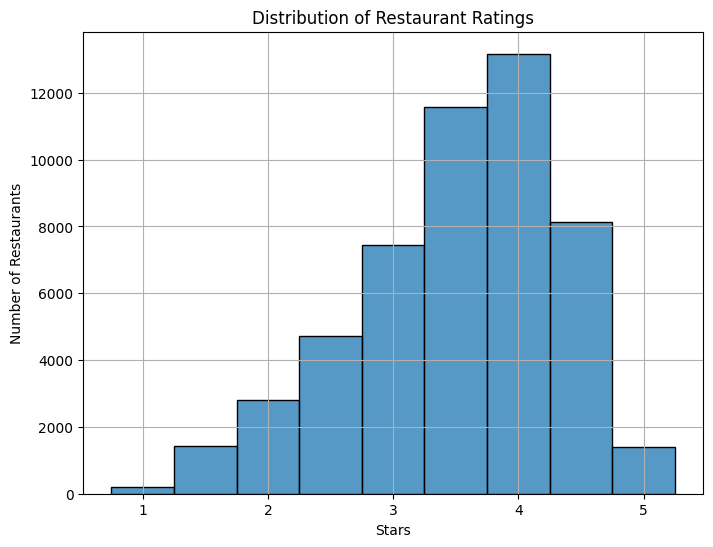

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(cleaned_restaurant_data_1['stars'],bins=[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Stars')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()

In [ ]:
destination_table = 'restaurant_dataset_1.cleaned_restaurant_data_1'
project_id = 'c2s4-project'

cleaned_restaurant_data_1.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 583.60it/s]
